In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

In [2]:
df_czh = pd.read_csv("Huaneng_SO2/Huaneng_cangzhou.csv")
df_dzu = pd.read_csv("Huaneng_SO2/Huaneng_Dezhou.csv")
df_fzu = pd.read_csv("Huaneng_SO2/Huaneng_Fuzhou.csv")
df_hmn = pd.read_csv("Huaneng_SO2/Huaneng_haimen.csv")
df_jlg = pd.read_csv("Huaneng_SO2/Huaneng_jinling.csv")
df_lwu = pd.read_csv("Huaneng_SO2/Huaneng_laiwu.csv")
df_lhg = pd.read_csv("Huaneng_SO2/Huaneng_luohuang.csv")
df_pgg = pd.read_csv("Huaneng_SO2/Huaneng_pingliang.csv")
df_qnb = pd.read_csv("Huaneng_SO2/Huaneng_qinbei.csv")
df_sgn = pd.read_csv("Huaneng_SO2/Huaneng_shangan.csv")
df_sgd = pd.read_csv("Huaneng_SO2/Huaneng_shangdu.csv")
df_ygu = pd.read_csv("Huaneng_SO2/Huaneng_yangluo.csv")
df_ymn = pd.read_csv("Huaneng_SO2/Huaneng_yimin.csv")
df_yyg = pd.read_csv("Huaneng_SO2/Huaneng_yueyang.csv")
df_yhn = pd.read_csv("Huaneng_SO2/Huaneng_yuhuan.csv")
df_sgk = pd.read_csv("Huaneng_SO2/Shidongkou.csv")

In [3]:
plant_list = [df_czh, df_dzu, df_fzu, df_hmn, df_jlg, df_lwu, df_lhg, df_pgg, df_qnb, df_sgn, df_sgd, df_ygu, df_ymn, df_yyg, df_yhn, df_sgk]
plant_names = ['cangzhou','dezhou','fuzhou','haimen','jinling','laiwu','luohuang','pingliang','qinbei','shangan','shangdu','yangluo','yimin','yueyang','yuhuan','shidongkou']

for plant in plant_list:
    plant.columns = ['date','SO2']

In [4]:
def change_numeric (a):
    for col in a.columns:
        if col !=  "date":
            a[col] = pd.to_numeric(a[col], errors ='coerce')


for i in range(len(plant_list)):
    plant_list[i].drop(list(range(0,7)), inplace =True)

In [5]:
for plant in plant_list:
    change_numeric(plant)

In [6]:
cleaned_list = []
for a in plant_list: 
    a['date'] = pd.to_datetime(a['date'])
    a = a.sort_values('date')
    a = a.dropna(subset=['SO2'])
    a = a[a['SO2'] > 0]
    a = a.reset_index(drop=True)
    cleaned_list.append(a)

plant_list = cleaned_list

In [7]:
dfs_for_final_merge = []

for i, df in enumerate(plant_list):
    plant_identifier = plant_names[i]
    df_copy = df.copy()

    new_column_name = f"{plant_identifier}_SO2"
    df_copy.rename(columns={'SO2': new_column_name}, inplace=True)

    dfs_for_final_merge.append(df_copy)

final_merged_df = None 

if dfs_for_final_merge:
    final_merged_df = dfs_for_final_merge[0]

    for i in range(1, len(dfs_for_final_merge)):
        df_to_merge = dfs_for_final_merge[i]
        final_merged_df = pd.merge(final_merged_df, df_to_merge, on='date', how='outer')

    print(final_merged_df.head())
    print("\n--- columns list ---")
    print(final_merged_df.columns.tolist())

else:
    print("There is no data frame")

        date  cangzhou_SO2  dezhou_SO2  fuzhou_SO2  haimen_SO2   jinling_SO2  \
0 2014-01-01         0.325         NaN        0.06        1.51  1.746684e+16   
1 2014-01-03         0.220         NaN         NaN         NaN           NaN   
2 2014-01-04         0.910        1.60        1.74        0.64           NaN   
3 2014-01-05           NaN        0.27        0.31        0.43  2.941195e+16   
4 2014-01-06           NaN         NaN         NaN         NaN  3.517075e+16   

   laiwu_SO2  luohuang_SO2  pingliang_SO2  qinbei_SO2  shangan_SO2  \
0        NaN      0.905755            NaN         NaN          NaN   
1        NaN           NaN           1.59         NaN          NaN   
2        NaN           NaN            NaN         NaN         0.58   
3        NaN      0.570000            NaN         NaN          NaN   
4   0.454787           NaN            NaN    0.330509          NaN   

   shangdu_SO2  yangluo_SO2  yimin_SO2  yueyang_SO2  yuhuan_SO2  \
0         1.68          NaN    

In [8]:
SO2_columns = [col for col in final_merged_df.columns if col.endswith('_SO2')]
final_merged_df['Total_SO2'] = final_merged_df[SO2_columns].sum(axis=1)

print("Total_SO2 컬럼 추가 후 final_merged_df의 컬럼:")
print(final_merged_df.columns) 
print(final_merged_df.head())

Total_SO2 컬럼 추가 후 final_merged_df의 컬럼:
Index(['date', 'cangzhou_SO2', 'dezhou_SO2', 'fuzhou_SO2', 'haimen_SO2',
       'jinling_SO2', 'laiwu_SO2', 'luohuang_SO2', 'pingliang_SO2',
       'qinbei_SO2', 'shangan_SO2', 'shangdu_SO2', 'yangluo_SO2', 'yimin_SO2',
       'yueyang_SO2', 'yuhuan_SO2', 'shidongkou_SO2', 'Total_SO2'],
      dtype='object')
        date  cangzhou_SO2  dezhou_SO2  fuzhou_SO2  haimen_SO2   jinling_SO2  \
0 2014-01-01         0.325         NaN        0.06        1.51  1.746684e+16   
1 2014-01-03         0.220         NaN         NaN         NaN           NaN   
2 2014-01-04         0.910        1.60        1.74        0.64           NaN   
3 2014-01-05           NaN        0.27        0.31        0.43  2.941195e+16   
4 2014-01-06           NaN         NaN         NaN         NaN  3.517075e+16   

   laiwu_SO2  luohuang_SO2  pingliang_SO2  qinbei_SO2  shangan_SO2  \
0        NaN      0.905755            NaN         NaN          NaN   
1        NaN           NaN    

In [9]:
Only_SO2_data = final_merged_df.drop(columns = ['date'])
total_SO2 = final_merged_df['Total_SO2']

In [10]:
merged_data = pd.DataFrame()
merged_data ['SO2'] = total_SO2
merged_data['date'] = final_merged_df['date']

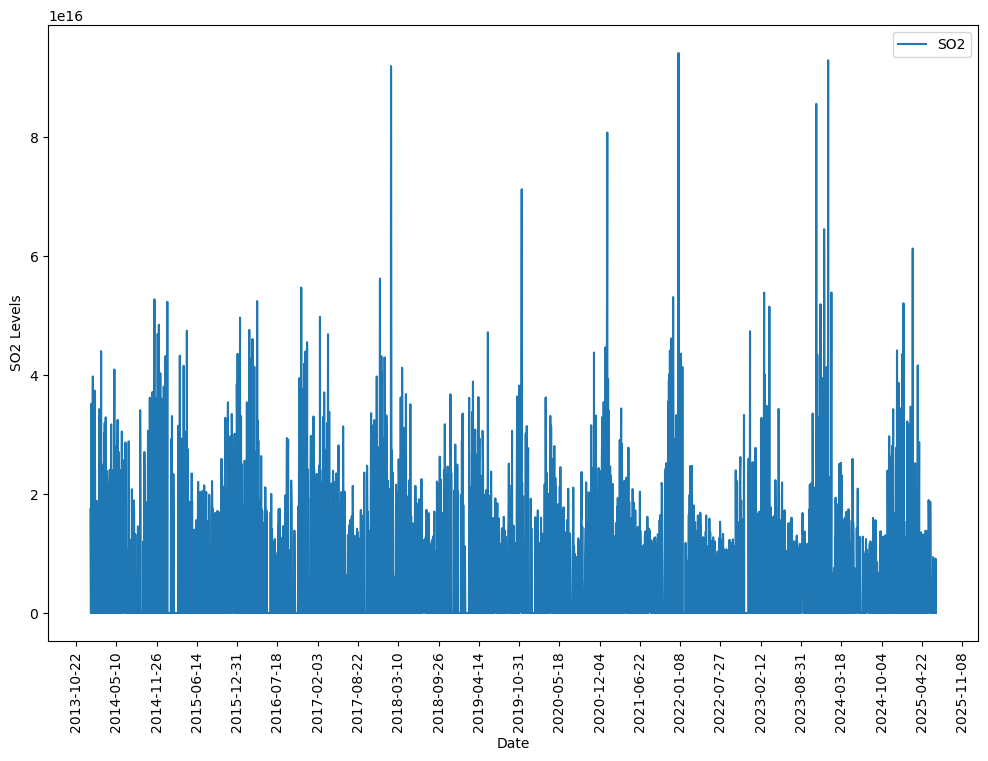

In [11]:
plt.figure(figsize=(12,8))

plt.plot(merged_data['date'],merged_data['SO2'],label = 'SO2')
plt.xlabel('Date')
plt.ylabel('SO2 Levels')
plt.xticks(rotation =90)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(30))
plt.legend()
plt.show()

In [12]:
df_port = pd.read_csv("port_of_shanghai_NO2_daily.csv")
df_port.columns = ['date','Port_NO2']

In [13]:
df_port=df_port.drop(list(range(0,7)))

In [14]:
change_numeric(df_port)

In [15]:
df_port['date'] = pd.to_datetime(df_port['date'])
df_port = df_port.sort_values('date')
df_port = df_port.dropna(subset=['Port_NO2'])
df_port = df_port[df_port['Port_NO2']>0]
df_port = df_port.reset_index(drop =True)

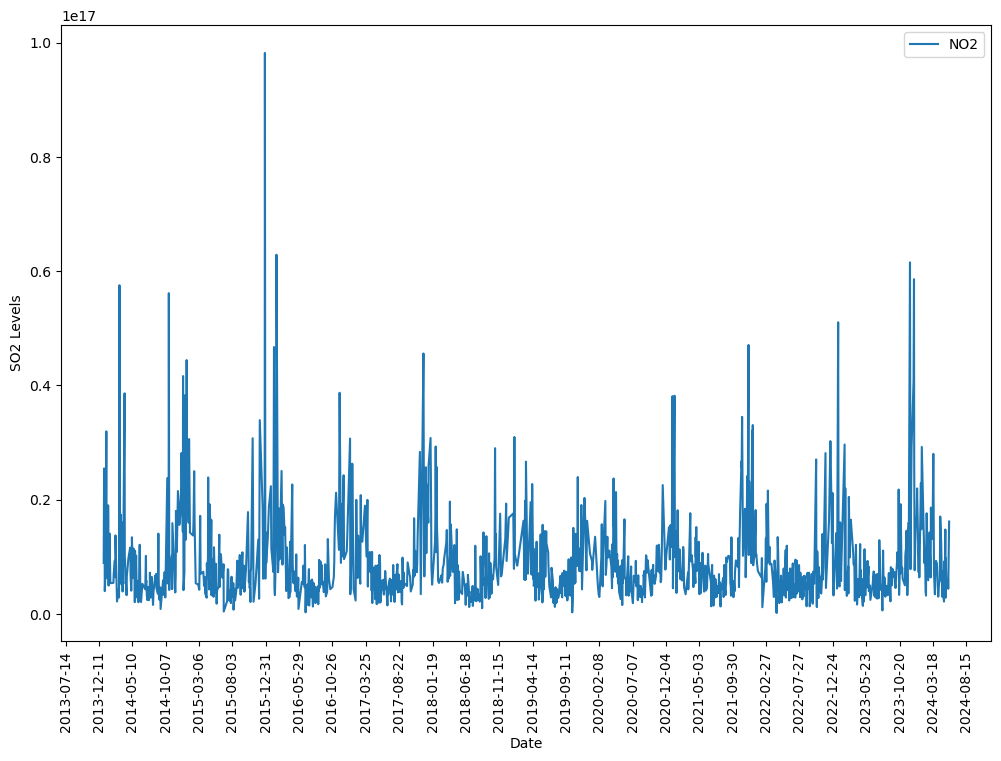

In [16]:
plt.figure(figsize=(12,8))

plt.plot(df_port['date'],df_port['Port_NO2'],label = 'NO2')
plt.xlabel('Date')
plt.ylabel('SO2 Levels')
plt.xticks(rotation =90)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(30))
plt.legend()
plt.show()

In [17]:
Power_Port = pd.merge(merged_data, df_port)

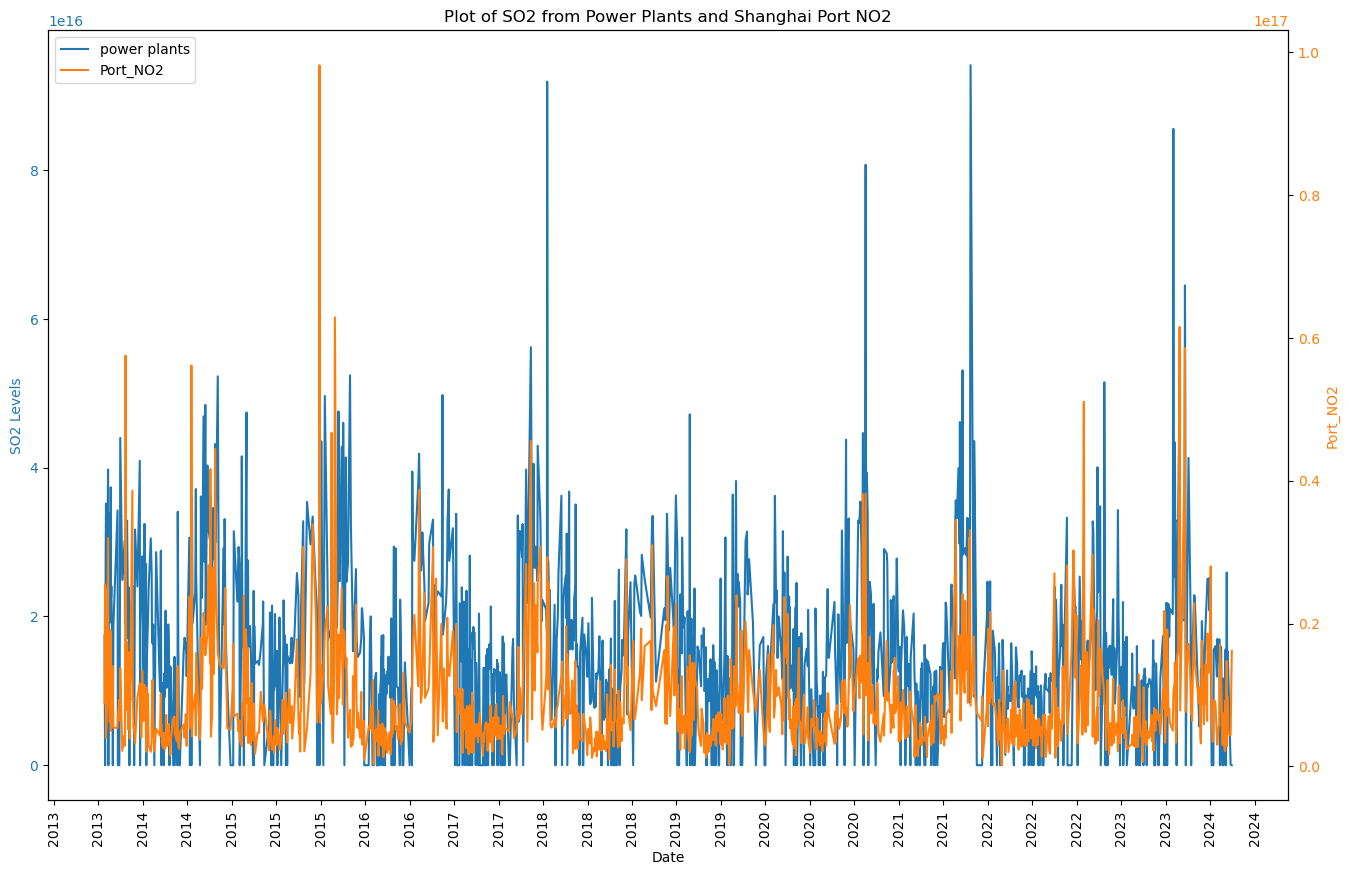

In [18]:
fig, ax1 = plt.subplots(figsize=(16, 10))
ax1.plot(Power_Port['date'], Power_Port['SO2'], color='tab:blue', label='power plants')
ax1.set_xlabel('Date')
ax1.set_ylabel('SO2 Levels', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.xaxis.set_major_locator(plt.MaxNLocator(30))
ax1.tick_params(axis='x', rotation=90)

ax2 = ax1.twinx()
ax2.plot(Power_Port['date'], Power_Port['Port_NO2'], color='tab:orange', label='Port_NO2')
ax2.set_ylabel('Port_NO2', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.title('Plot of SO2 from Power Plants and Shanghai Port NO2')
plt.show()

In [19]:
from pandas import DataFrame
df = DataFrame()
df['NO2'] =Power_Port['Port_NO2']
df['SO2'] =Power_Port['SO2']

In [21]:
from statsmodels.tsa.stattools import grangercausalitytests


# Granger causality test 
max_lag = 7
grangercausalitytests(df[['NO2', 'SO2']], maxlag=max_lag, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=258.5145, p=0.0000  , df_denom=1272, df_num=1
ssr based chi2 test:   chi2=258.9210, p=0.0000  , df=1
likelihood ratio test: chi2=235.7072, p=0.0000  , df=1
parameter F test:         F=258.5145, p=0.0000  , df_denom=1272, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=82.8203 , p=0.0000  , df_denom=1269, df_num=2
ssr based chi2 test:   chi2=166.1626, p=0.0000  , df=2
likelihood ratio test: chi2=156.1781, p=0.0000  , df=2
parameter F test:         F=82.8203 , p=0.0000  , df_denom=1269, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=38.5122 , p=0.0000  , df_denom=1266, df_num=3
ssr based chi2 test:   chi2=116.0843, p=0.0000  , df=3
likelihood ratio test: chi2=111.0890, p=0.0000  , df=3
parameter F test:         F=38.5122 , p=0.0000  , df_denom=1266, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=20.9566 , p=0.

C:\Users\Sehong\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


{np.int64(1): ({'ssr_ftest': (np.float64(258.5144973426285),
    np.float64(4.2787019458953e-53),
    np.float64(1272.0),
    np.int64(1)),
   'ssr_chi2test': (np.float64(258.9209666780729),
    np.float64(2.9493171988999448e-58),
    np.int64(1)),
   'lrtest': (np.float64(235.7071820970159),
    np.float64(3.394423434838589e-53),
    np.int64(1)),
   'params_ftest': (np.float64(258.5144973426284),
    np.float64(4.278701945895726e-53),
    np.float64(1272.0),
    1.0)},
   array([[0., 1., 0.]])]),
 np.int64(2): ({'ssr_ftest': (np.float64(82.82025463808749),
    np.float64(1.559225182089653e-34),
    np.float64(1269.0),
    np.int64(2)),
   'ssr_chi2test': (np.float64(166.16262278059162),
    np.float64(8.28409201048933e-37),
    np.int64(2)),
   'lrtest': (np.float64(156.17814873578027),
    np.float64(1.2199608815251229e-34),
    np.int64(2)),
   'params_ftest': (np.float64(82.82025463808773),
    np.float64(1.5592251820894093e-34),
    np.float64(1269.0),
    2.0)},
   array([[0., 0

In [22]:
from statsmodels.tsa.stattools import grangercausalitytests

# Granger causality test
print("=== Granger Causality Test (NO2 → Y) ===")
grangercausalitytests(df[['SO2', 'NO2']], maxlag=max_lag, verbose=True)

print("\n=== Granger Causality Test (SO2 → NO2) ===")
grangercausalitytests(df[['NO2', 'SO2']], maxlag=max_lag, verbose=True)

# VAR 모델 적합 및 R² 평가
model = VAR(df)
results = model.fit(maxlags=max_lag)
print("\n=== VAR 모델 요약 ===")
print(results.summary())

# 각 변수별 R² 계산
print("\n=== 각 변수별 설명력 (R²) ===")
for col in df.columns:
    actual = df[col].iloc[max_lag:]
    predicted = results.fittedvalues[col]
    ss_res = np.sum((actual - predicted) ** 2)
    ss_tot = np.sum((actual - np.mean(actual)) ** 2)
    r_squared = 1 - ss_res / ss_tot
    print(f"{col}에 대한 R²: {r_squared:.4f}")

=== Granger Causality Test (NO2 → Y) ===

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=224.6470, p=0.0000  , df_denom=1272, df_num=1
ssr based chi2 test:   chi2=225.0002, p=0.0000  , df=1
likelihood ratio test: chi2=207.1993, p=0.0000  , df=1
parameter F test:         F=224.6470, p=0.0000  , df_denom=1272, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=76.9382 , p=0.0000  , df_denom=1269, df_num=2
ssr based chi2 test:   chi2=154.3614, p=0.0000  , df=2
likelihood ratio test: chi2=145.6964, p=0.0000  , df=2
parameter F test:         F=76.9382 , p=0.0000  , df_denom=1269, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=44.0284 , p=0.0000  , df_denom=1266, df_num=3
ssr based chi2 test:   chi2=132.7113, p=0.0000  , df=3
likelihood ratio test: chi2=126.2350, p=0.0000  , df=3
parameter F test:         F=44.0284 , p=0.0000  , df_denom=1266, df_num=3

Granger Causality
number of lags (no zero) 4
s

C:\Users\Sehong\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Sehong\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


NameError: name 'VAR' is not defined

In [23]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series, title=''):
    print(f'=== ADF Test: {title} ===')
    result = adfuller(series, autolag='AIC')
    labels = ['ADF Statistic', 'p-value', '# Lags Used', 'Number of Observations Used']
    for value, label in zip(result[:4], labels):
        print(f'{label}: {value}')
    if result[1] <= 0.05:
        print("✅ Strong evidence against the null hypothesis(H0), reject H0. Series is stationary.")
    else:
        print("⚠️ Weak evidence against the null hypothesis, fail to reject H0. Series is non-stationary.")
    print()

# ADF test for both series
adf_test(df['NO2'], title='NO2')
adf_test(df['SO2'], title='SO2')

=== ADF Test: NO2 ===
ADF Statistic: -2.4543115750395823
p-value: 0.12699011686893646
# Lags Used: 13
Number of Observations Used: 1261
⚠️ Weak evidence against the null hypothesis, fail to reject H0. Series is non-stationary.

=== ADF Test: SO2 ===
ADF Statistic: -2.2877255174023268
p-value: 0.17595730119314584
# Lags Used: 12
Number of Observations Used: 1262
⚠️ Weak evidence against the null hypothesis, fail to reject H0. Series is non-stationary.



In [24]:
# 1차 차분
diff_data = df.diff().dropna()

# 다시 ADF 테스트
print("=== After Differencing ===")
adf_test(diff_data['NO2'], title='Differenced NO2')
adf_test(diff_data['SO2'], title='Differenced SO2')

=== After Differencing ===
=== ADF Test: Differenced NO2 ===
ADF Statistic: -14.80993257904621
p-value: 2.0377516754235915e-27
# Lags Used: 12
Number of Observations Used: 1261
✅ Strong evidence against the null hypothesis(H0), reject H0. Series is stationary.

=== ADF Test: Differenced SO2 ===
ADF Statistic: -16.218821528536278
p-value: 3.91706445338484e-29
# Lags Used: 11
Number of Observations Used: 1262
✅ Strong evidence against the null hypothesis(H0), reject H0. Series is stationary.



In [25]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests

# Granger causality test (차분 데이터로)
print("\n=== Granger Causality Test (diff NO2 → diff SO2) ===")
grangercausalitytests(diff_data[['SO2', 'NO2']], maxlag=5, verbose=True)

print("\n=== Granger Causality Test (diff SO2 → diff NO2) ===")
grangercausalitytests(diff_data[['NO2', 'SO2']], maxlag=5, verbose=True)

# VAR 모델 적합
model_diff = VAR(diff_data)
results_diff = model_diff.fit(maxlags=5)

# VAR 요약
print("\n=== VAR Model Summary (Differenced Data) ===")
print(results_diff.summary())


=== Granger Causality Test (diff NO2 → diff SO2) ===

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.1399  , p=0.0133  , df_denom=1271, df_num=1
ssr based chi2 test:   chi2=6.1495  , p=0.0131  , df=1
likelihood ratio test: chi2=6.1347  , p=0.0133  , df=1
parameter F test:         F=6.1399  , p=0.0133  , df_denom=1271, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.1698  , p=0.0423  , df_denom=1268, df_num=2
ssr based chi2 test:   chi2=6.3597  , p=0.0416  , df=2
likelihood ratio test: chi2=6.3438  , p=0.0419  , df=2
parameter F test:         F=3.1698  , p=0.0423  , df_denom=1268, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.7943  , p=0.0025  , df_denom=1265, df_num=3
ssr based chi2 test:   chi2=14.4510 , p=0.0024  , df=3
likelihood ratio test: chi2=14.3695 , p=0.0024  , df=3
parameter F test:         F=4.7943  , p=0.0025  , df_denom=1265, df_num=3

Granger Causality
number of lags 

C:\Users\Sehong\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Sehong\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Sehong\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [26]:
from statsmodels.stats.diagnostic import acorr_lm

# 각 변수 잔차 추출
resid_NO2 = results_diff.resid['NO2']
resid_SO2 = results_diff.resid['SO2']

# LM test (H0: No autocorrelation)
lm_NO2 = acorr_lm(resid_NO2, nlags=5)
lm_SO2 = acorr_lm(resid_SO2, nlags=5)

print("=== LM Test (NO2 Residuals) ===")
print(f"LM Statistic: {lm_NO2[0]:.4f}, p-value: {lm_NO2[1]:.4f}")

print("\n=== LM Test (SO2 Residuals) ===")
print(f"LM Statistic: {lm_SO2[0]:.4f}, p-value: {lm_SO2[1]:.4f}")

=== LM Test (NO2 Residuals) ===
LM Statistic: 23.8780, p-value: 0.0002

=== LM Test (SO2 Residuals) ===
LM Statistic: 38.9854, p-value: 0.0000


C:\Users\Sehong\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


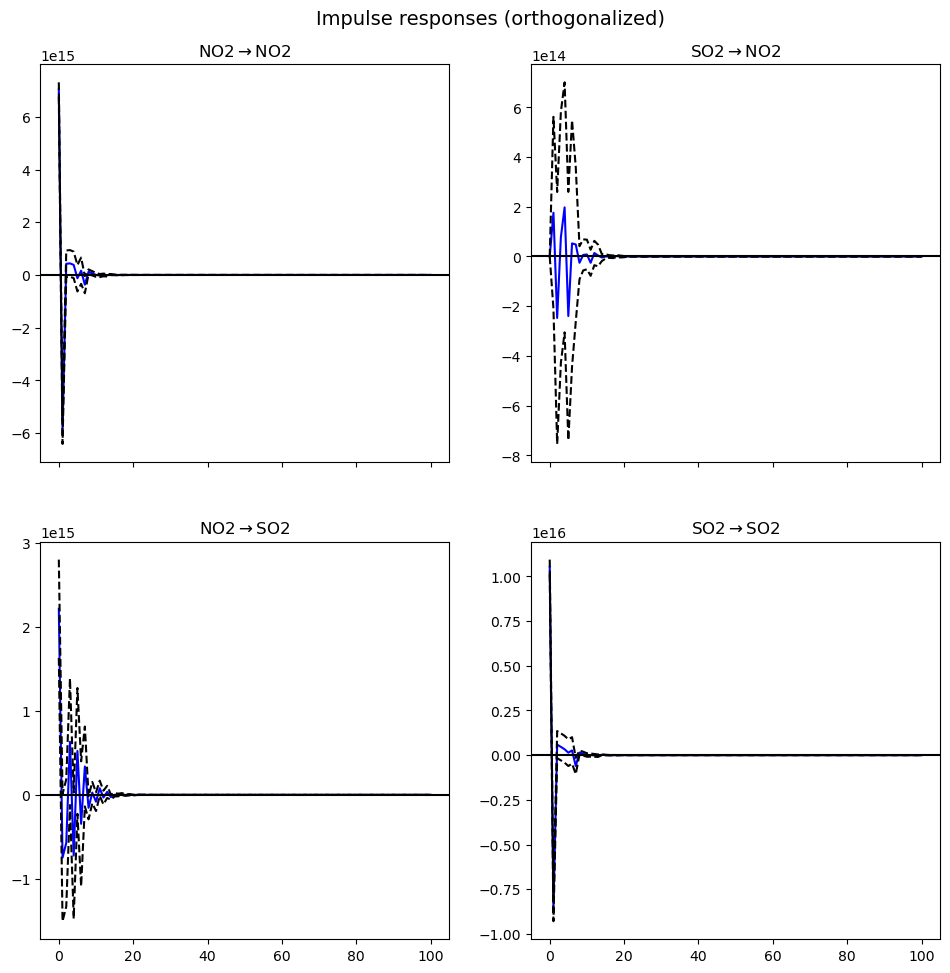

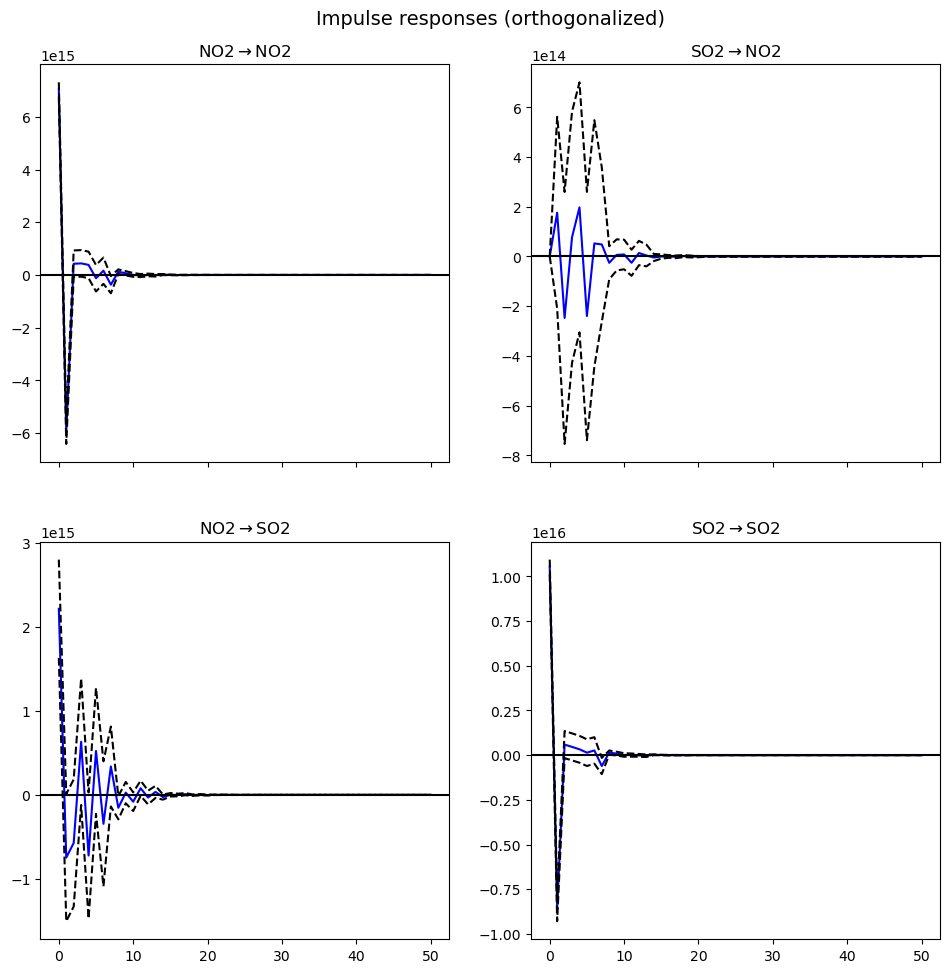

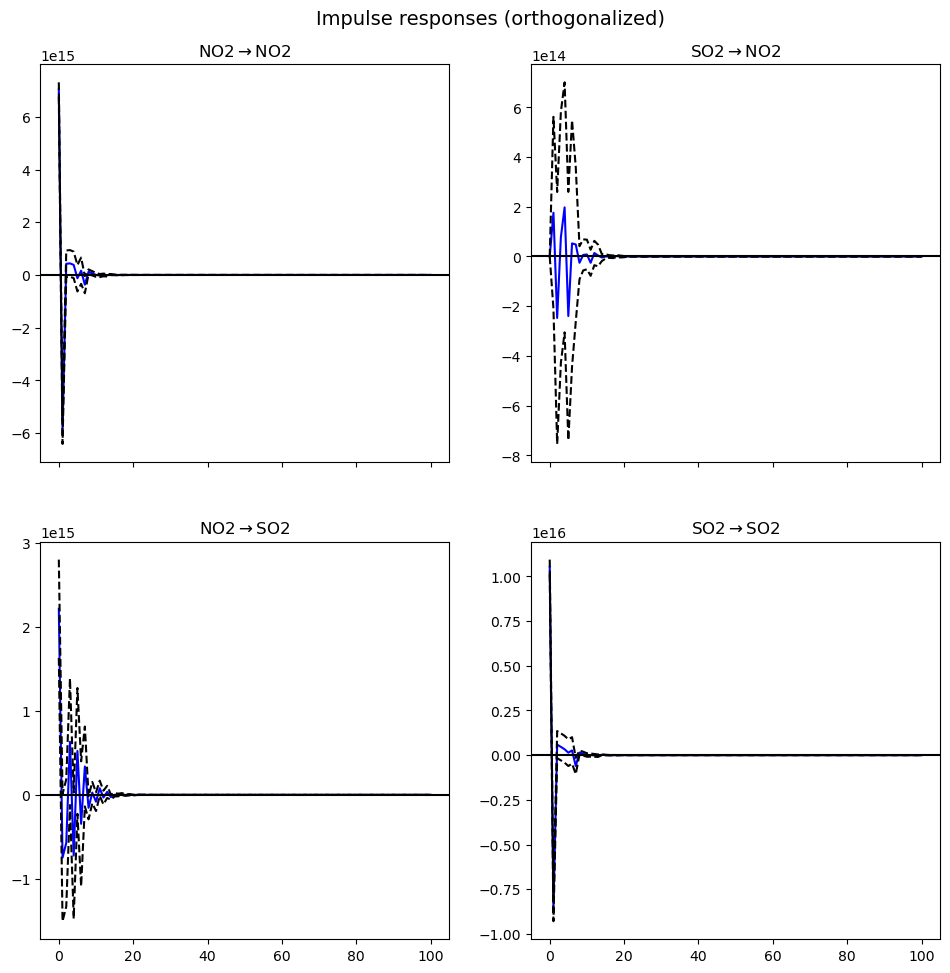

In [27]:
# VAR 모델 적합 (차분 데이터 기준)
from statsmodels.tsa.api import VAR

# VAR 적합 (이미 차분된 데이터 diff_data 사용)
model = VAR(diff_data)
results = model.fit(maxlags=5)

# IRF horizon 확장 (50 step)
irf_long = results.irf(50)
irf_long.plot(orth=True)  # orthogonalized IRF (Cholesky 분해)

# IRF horizon 확장 (100 step)도 추가
irf_very_long = results.irf(100)
irf_very_long.plot(orth=True)

In [28]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

# NO₂와 SO₂ 데이터 (예: df[['NO2', 'SO2']])
johansen_test = coint_johansen(df[['NO2', 'SO2']], det_order=0, k_ar_diff=1)

# Trace statistic과 5% 임계값 출력
print("Trace Statistic:", johansen_test.lr1)
print("5% Critical Value:", johansen_test.cvt[:, 1])

# 고유값 출력
print("Eigenvalues:", johansen_test.eig)

Trace Statistic: [721.05850473 194.07494177]
5% Critical Value: [15.4943  3.8415]
Eigenvalues: [0.33897909 0.14140229]


In [29]:
from statsmodels.tsa.vector_ar.vecm import VECM

# VECM 적합
vecm_model = VECM(df[['NO2', 'SO2']], k_ar_diff=1, coint_rank=1, deterministic="ci")
vecm_results = vecm_model.fit()

# 결과 요약
print(vecm_results.summary())

Det. terms outside the coint. relation & lagged endog. parameters for equation NO2
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
L1.NO2        -0.3781      0.028    -13.379      0.000      -0.433      -0.323
L1.SO2        -0.1196      0.021     -5.765      0.000      -0.160      -0.079
Det. terms outside the coint. relation & lagged endog. parameters for equation SO2
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
L1.NO2        -0.2984      0.039     -7.671      0.000      -0.375      -0.222
L1.SO2        -0.1786      0.029     -6.250      0.000      -0.235      -0.123
                Loading coefficients (alpha) for equation NO2                 
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------

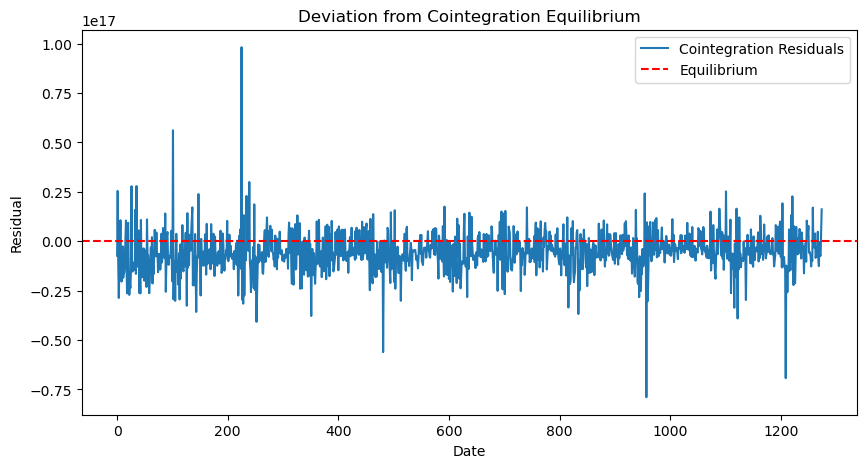

In [30]:
# 공적분 잔차 계산
beta = vecm_results.beta[:, 0]  # 공적분 벡터 가져오기
residuals = df['NO2'] + beta[1] * df['SO2']

# 잔차 플롯
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(df.index, residuals, label="Cointegration Residuals")
plt.axhline(0, color='red', linestyle='--', label='Equilibrium')  # 수정된 따옴표
plt.title("Deviation from Cointegration Equilibrium")
plt.xlabel("Date")
plt.ylabel("Residual")
plt.legend()
plt.show()

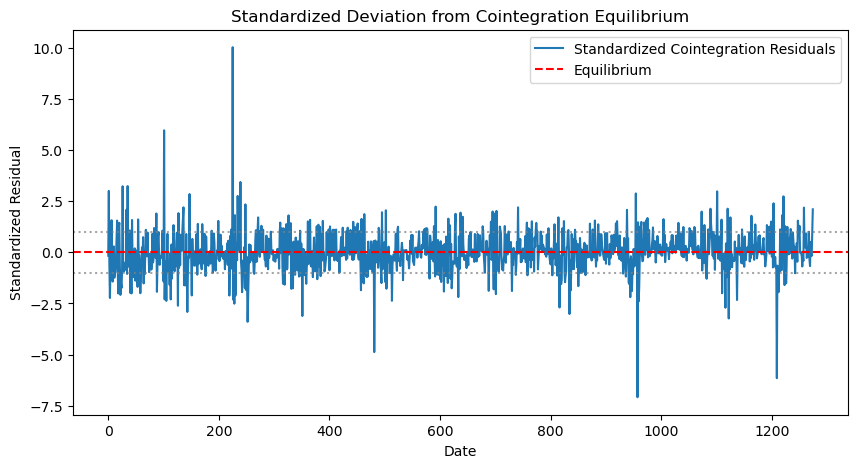

In [31]:
# 잔차 표준화
residual_mean = np.mean(residuals)
residual_std = np.std(residuals)
standardized_residuals = (residuals - residual_mean) / residual_std

# 표준화된 잔차 플롯
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(df.index, standardized_residuals, label="Standardized Cointegration Residuals")
plt.axhline(0, color='red', linestyle='--', label='Equilibrium')
plt.axhline(1, color='grey', linestyle=':', alpha=0.7)
plt.axhline(-1, color='grey', linestyle=':', alpha=0.7)
plt.title("Standardized Deviation from Cointegration Equilibrium")
plt.xlabel("Date")
plt.ylabel("Standardized Residual")
plt.legend()
plt.show()

In [32]:
import numpy as np

# 1. 파라미터 추출
alpha = vecm_results.alpha
beta = vecm_results.beta
gamma = vecm_results.gamma
sigma_u = vecm_results.sigma_u  # 공분산행렬

# 2. 장기효과 행렬 C(1) 계산
identity = np.eye(alpha.shape[0])
long_run_impact = beta @ np.linalg.inv(alpha.T @ beta) @ alpha.T

# 3. 예측오차 분산분해 비율 계산
# 총 분산
total_variance = np.trace(long_run_impact @ sigma_u @ long_run_impact.T)

# 변수별 기여도
variable_contributions = np.diag(long_run_impact @ sigma_u @ long_run_impact.T) / total_variance * 100

# 출력
for i, var in enumerate(['NO2', 'SO2']):  # 변수명 데이터에 맞게 수정
    print(f"ratio that {var} contribute to the long term volatility: {variable_contributions[i]:.2f}%")

ratio that NO2 contribute to the long term volatility: 53.66%
ratio that SO2 contribute to the long term volatility: 46.34%


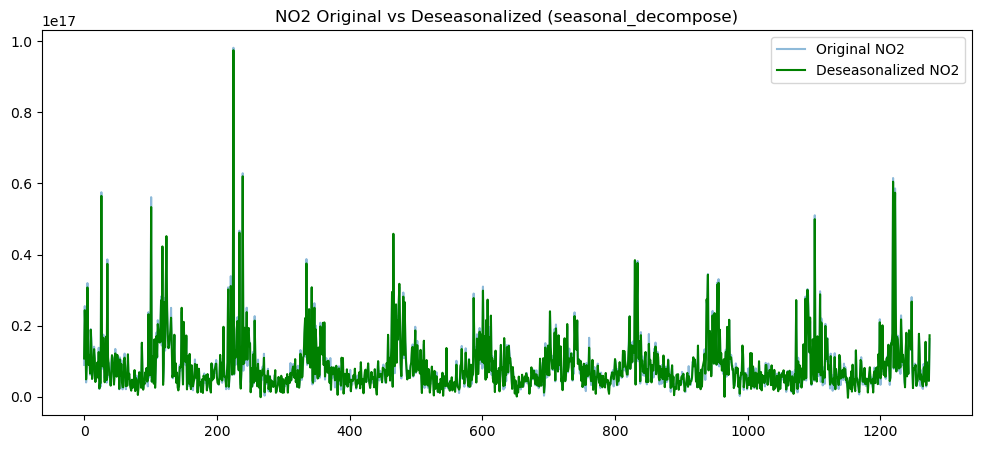

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose



# 인덱스를 연속적인 일별 시계열로 강제 변환 (결측일은 NaN 생성)

# 결측치 선형 보간
df['NO2'] = df['NO2'].interpolate(method='linear')
df['SO2'] = df['SO2'].interpolate(method='linear')

# 남아있는 NaN 제거 (혹시라도 데이터 맨 앞/뒤에 NaN 있으면)
df = df.dropna()

# 계절성 분해 (Additive 모드, 월주기 가정)
decomp_no2 = seasonal_decompose(df['NO2'], model='additive', period=30, extrapolate_trend='freq')
decomp_so2 = seasonal_decompose(df['SO2'], model='additive', period=30, extrapolate_trend='freq')

# 계절성 제거
no2_adj = df['NO2'] - decomp_no2.seasonal
so2_adj = df['SO2'] - decomp_so2.seasonal

# 결과 데이터프레임
deseason_df = pd.concat([no2_adj, so2_adj], axis=1)
deseason_df.columns = ['NO2', 'SO2']

# 시각화
plt.figure(figsize=(12,5))
plt.plot(df['NO2'], label='Original NO2', alpha=0.5)
plt.plot(no2_adj, label='Deseasonalized NO2', color='green')
plt.legend()
plt.title('NO2 Original vs Deseasonalized (seasonal_decompose)')
plt.show()

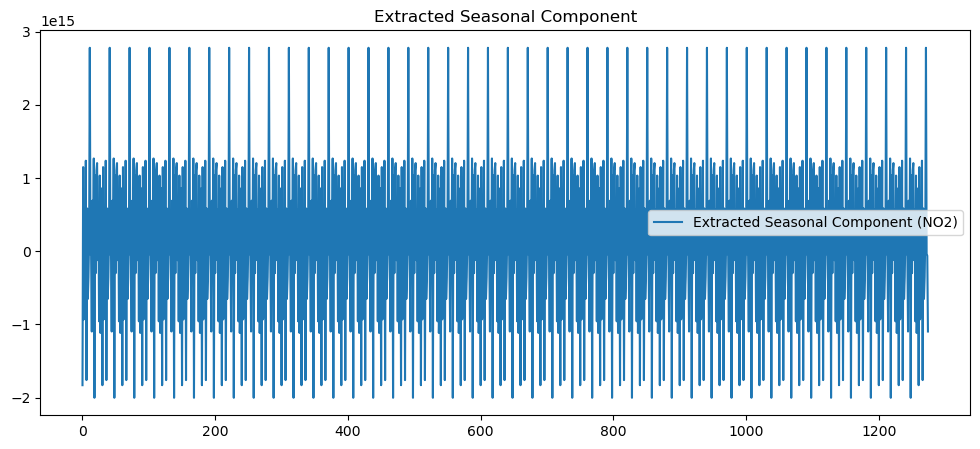

In [35]:
plt.figure(figsize=(12,5))
plt.plot(decomp_no2.seasonal, label='Extracted Seasonal Component (NO2)')
plt.legend()
plt.title('Extracted Seasonal Component')
plt.show()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 16, Jul, 2025
Time:                     02:58:28
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    146.671
Nobs:                     1270.00    HQIC:                   146.615
Log likelihood:          -96661.6    FPE:                4.56781e+63
AIC:                      146.582    Det(Omega_mle):     4.48970e+63
--------------------------------------------------------------------
Results for equation NO2
            coefficient              std. error           t-stat            prob
--------------------------------------------------------------------------------
const          0.000000  428222971316612.750000            0.000           1.000
L1.NO2         0.076368                0.029378            2.600           0.009
L1.SO2         0.073208                0.019431            3.7

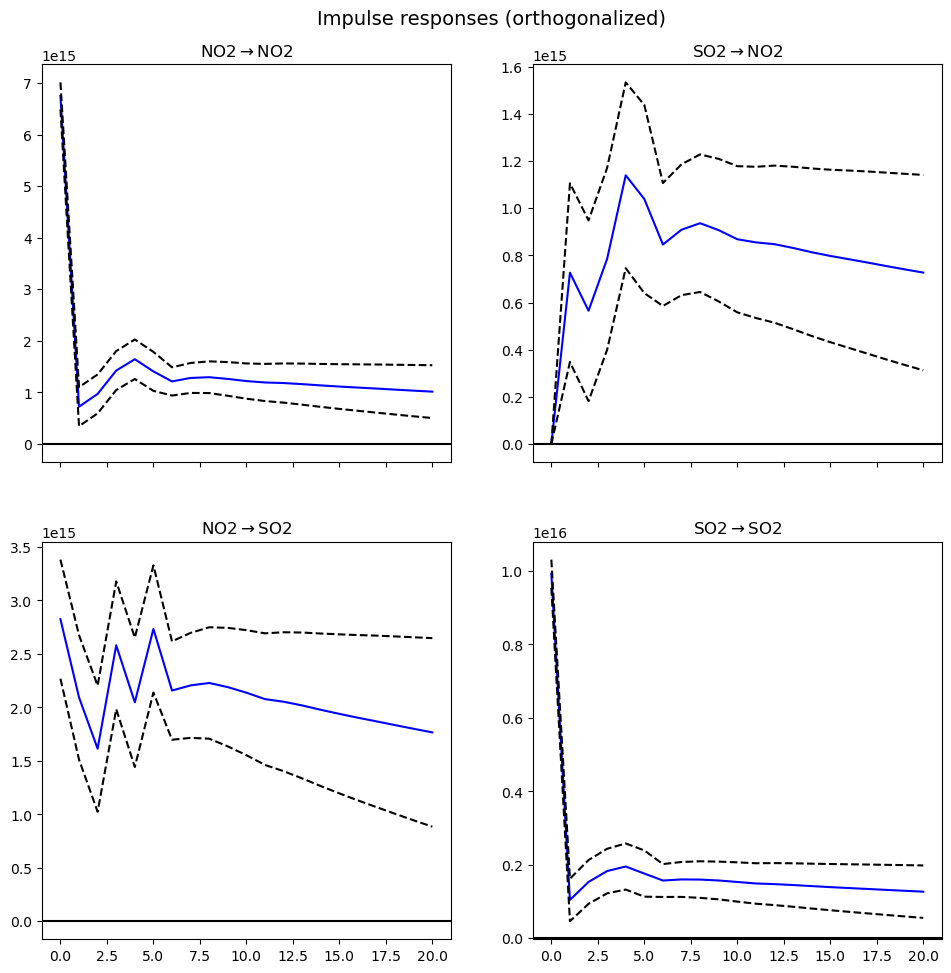

In [36]:
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt

# 계절성 제거된 데이터
deseason_df = pd.concat([no2_adj, so2_adj], axis=1)
deseason_df.columns = ['NO2', 'SO2']

# VAR 모델 적합
model = VAR(deseason_df.dropna())
results = model.fit(maxlags=5, ic='aic')
print(results.summary())

# Impulse Response
irf = results.irf(20)
irf.plot(orth=True)
plt.show()

In [37]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

# 공적분 검정
coint_test = coint_johansen(deseason_df.dropna(), det_order=0, k_ar_diff=1)
print("Trace Statistics:", coint_test.lr1)
print("Critical Values (5%):", coint_test.cvt[:,1])

Trace Statistics: [714.27734304 192.16515796]
Critical Values (5%): [15.4943  3.8415]


In [ ]:
!pip install prophet


In [43]:
df2 =Power_Port.copy()
df2.columns =['SO2','Date','NO2']

In [45]:
df2['Date'] = pd.to_datetime(df2['Date'], errors='coerce')


Empty DataFrame
Columns: [SO2, Date, NO2]
Index: []


03:10:15 - cmdstanpy - INFO - Chain [1] start processing
03:10:15 - cmdstanpy - INFO - Chain [1] done processing


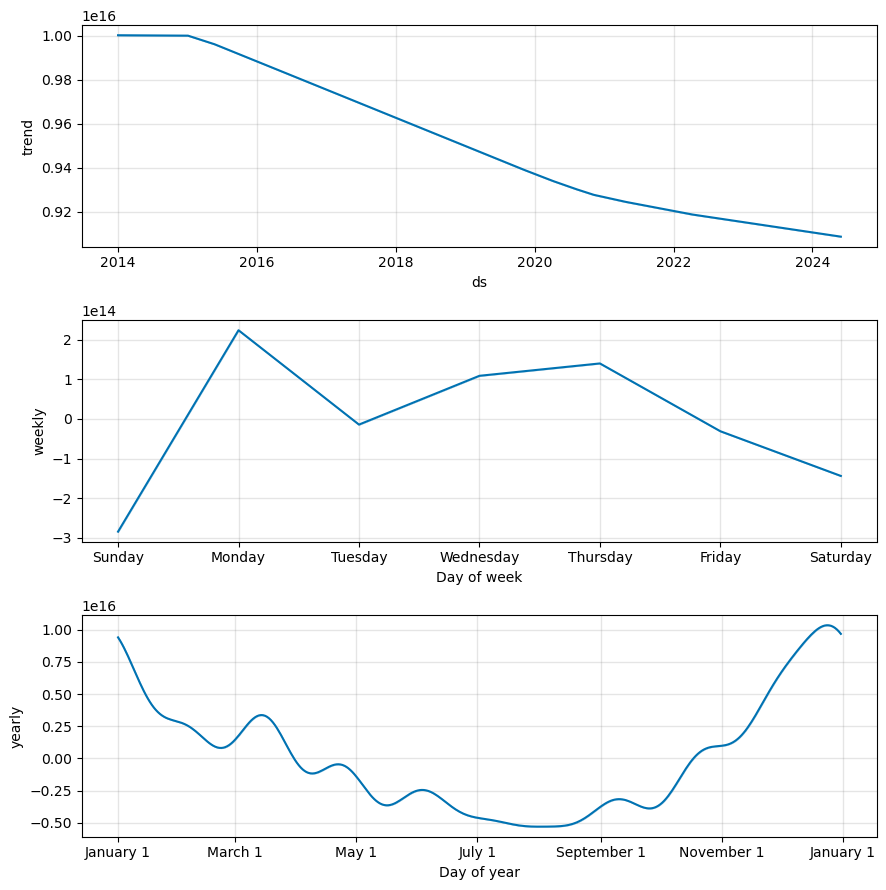

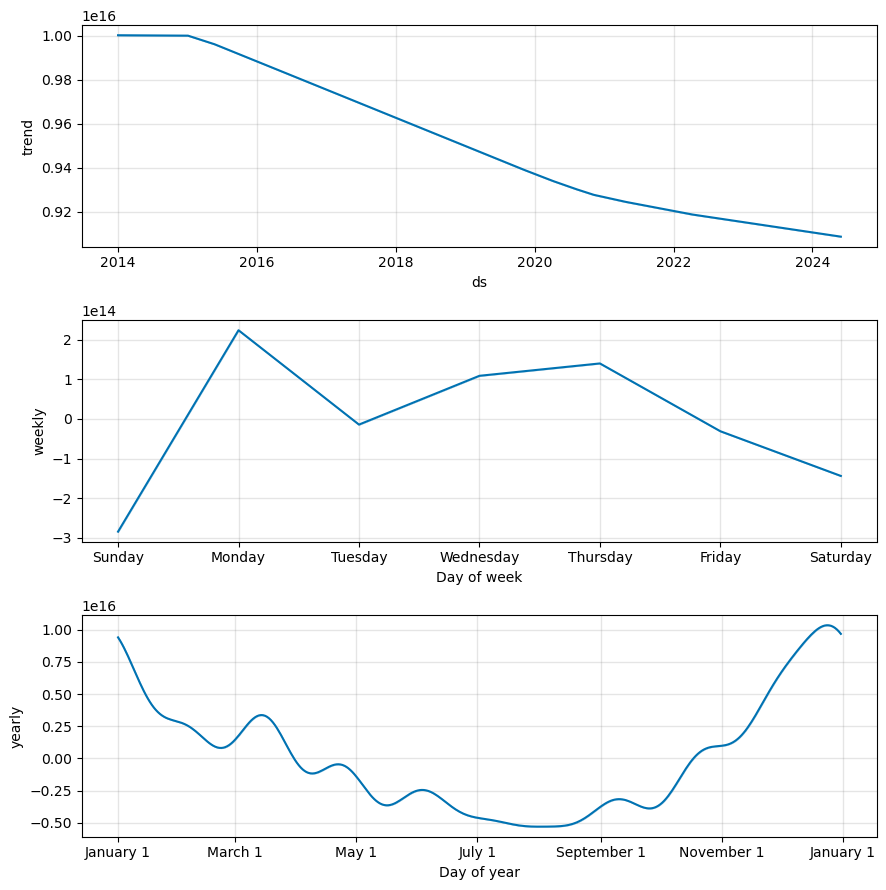

In [67]:
from prophet import Prophet
import pandas as pd

# 데이터 준비
df2_prophet = df2_prophet.drop_duplicates(subset=['ds'])

# NaN 제거
df2_prophet['ds'] = pd.to_datetime(df2_prophet['ds'], errors='coerce')

# y 컬럼을 숫자로 강제 변환 (문자열 껴있을 경우)
df2_prophet = df2_prophet.dropna(subset=['ds'])
df2_prophet['ds'] = df2_prophet['ds'].dt.strftime('%Y-%m-%d')
df2_prophet = df2_prophet.drop_duplicates(subset=['ds'])
df2_prophet['y'] = pd.to_numeric(df2_prophet['y'], errors='coerce')
df2_prophet = df2_prophet.dropna(subset=['y'])

model = Prophet()
model.fit(df2_prophet)

future = model.make_future_dataframe(periods=0)
forecast = model.predict(future)

model.plot_components(forecast)


03:12:52 - cmdstanpy - INFO - Chain [1] start processing
03:12:52 - cmdstanpy - INFO - Chain [1] done processing


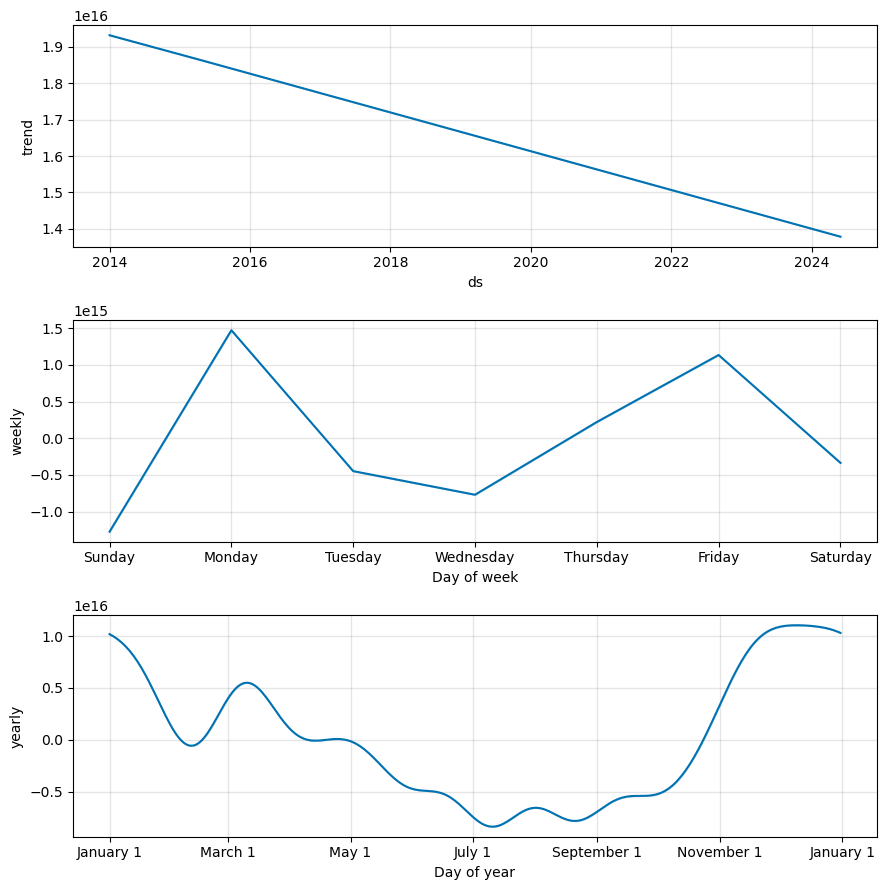

In [69]:
from prophet import Prophet
import matplotlib.pyplot as plt

# SO2 데이터 Prophet 포맷으로
df_so2_prophet = df2.reset_index().rename(columns={'Date':'ds', 'SO2':'y'})[['ds','y']]

# Prophet 모델 적합
model_so2 = Prophet()
model_so2.fit(df_so2_prophet)

# 분해된 컴포넌트 시각화
forecast_so2 = model_so2.predict(df_so2_prophet)
model_so2.plot_components(forecast_so2)
plt.show()


In [77]:
pred_no2 = model.predict(df2_prophet)
pred_so2 = model_so2.predict(df_so2_prophet)

# Prophet이 생성한 예측값과 df2 길이 맞추기
yhat_no2 = pred_no2['yhat'].iloc[:len(df2)].values
yhat_so2 = pred_so2['yhat'].iloc[:len(df2)].values

# 잔차 계산
residual_no2 = df2['NO2'].values - yhat_no2
residual_so2 = df2['SO2'].values - yhat_so2

# 잔차 데이터프레임
residual_df = pd.DataFrame({
    'NO2_resid': residual_no2,
    'SO2_resid': residual_so2
}, index=df2.index).dropna()

# 공적분 테스트
from statsmodels.tsa.vector_ar.vecm import coint_johansen

result = coint_johansen(residual_df, det_order=0, k_ar_diff=1)
print("Trace Statistic:", result.lr1)
print("Critical Values (5%):", result.cvt[:, 1])

Trace Statistic: [1053.09438896  466.23633867]
Critical Values (5%): [15.4943  3.8415]


In [78]:
beta = result.evec[:, 0]  # 첫 번째 공적분 벡터 (장기 균형 관계)
print("공적분 관계 β 벡터:", beta)

공적분 관계 β 벡터: [ 2.27080306e-16 -7.84249580e-17]


In [79]:
from statsmodels.tsa.vector_ar.vecm import VECM

vecm_model = VECM(residual_df, k_ar_diff=1, coint_rank=1, deterministic='n')
vecm_res = vecm_model.fit()

print(vecm_res.summary())

Det. terms outside the coint. relation & lagged endog. parameters for equation NO2_resid
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
L1.NO2_resid    -0.0449      0.030     -1.490      0.136      -0.104       0.014
L1.SO2_resid    -0.1513      0.016     -9.726      0.000      -0.182      -0.121
Det. terms outside the coint. relation & lagged endog. parameters for equation SO2_resid
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
L1.NO2_resid    -0.2166      0.051     -4.229      0.000      -0.317      -0.116
L1.SO2_resid    -0.4218      0.026    -15.967      0.000      -0.474      -0.370
             Loading coefficients (alpha) for equation NO2_resid              
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------

In [80]:
print("조정계수 alpha:")
print(vecm_res.alpha)

조정계수 alpha:
[[-0.92967725]
 [ 0.59974582]]


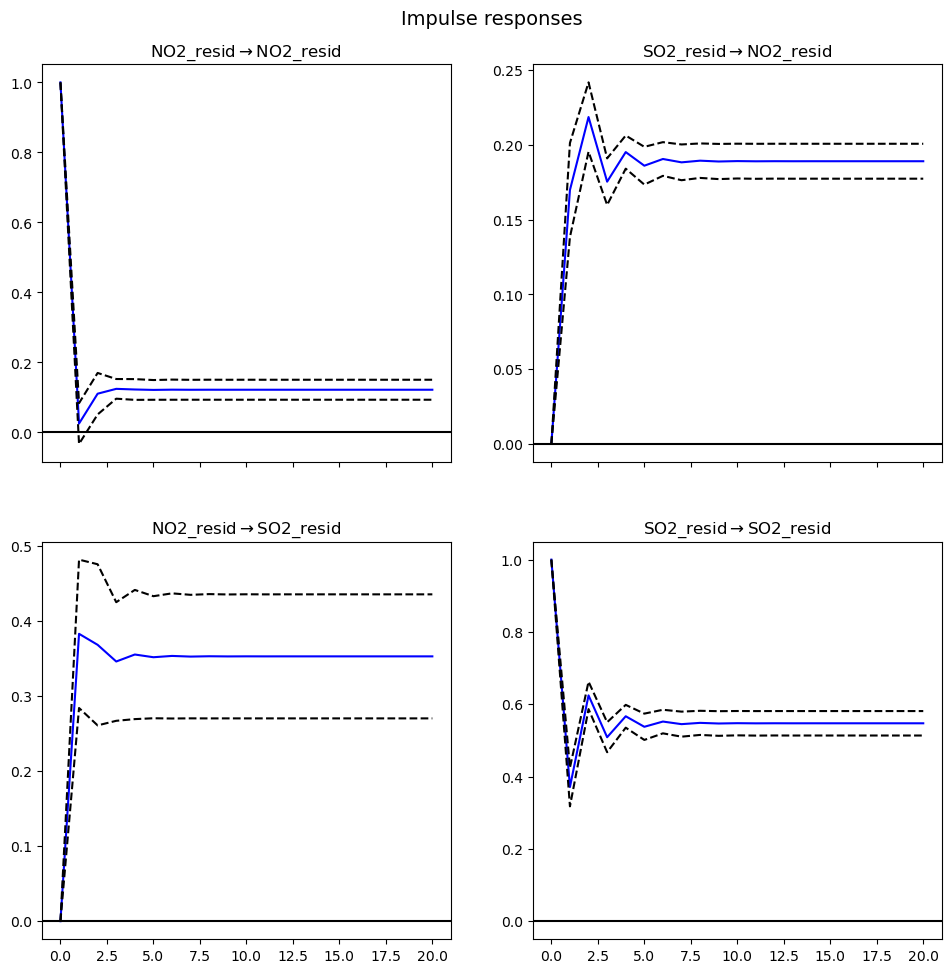

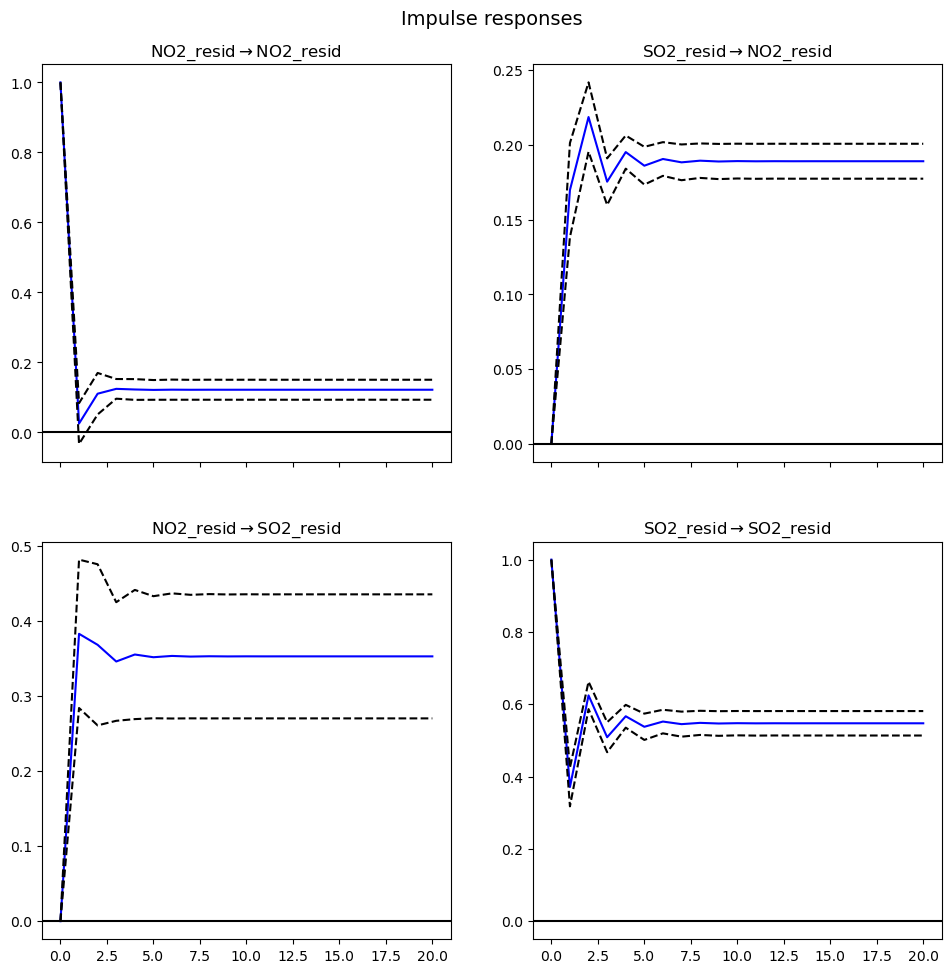

In [81]:
irf = vecm_res.irf(20)  # 20 스텝까지 IRF 계산
irf.plot(orth=False)

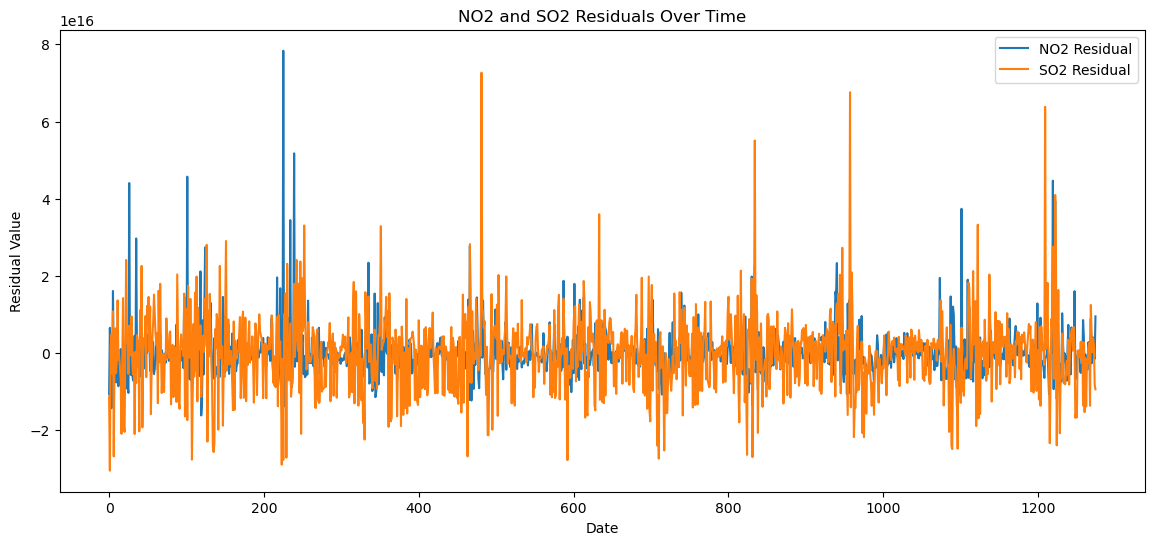

In [82]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(residual_df.index, residual_df['NO2_resid'], label='NO2 Residual')
plt.plot(residual_df.index, residual_df['SO2_resid'], label='SO2 Residual')
plt.xlabel('Date')
plt.ylabel('Residual Value')
plt.title('NO2 and SO2 Residuals Over Time')
plt.legend()
plt.show()

잔차 상관계수 (NO2_resid vs SO2_resid): 0.2051


<Figure size 1200x400 with 0 Axes>

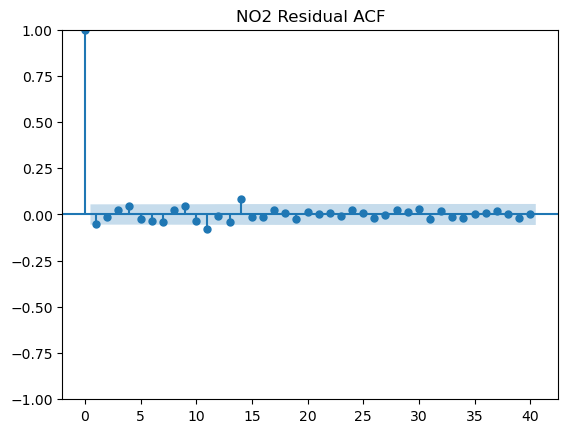

<Figure size 1200x400 with 0 Axes>

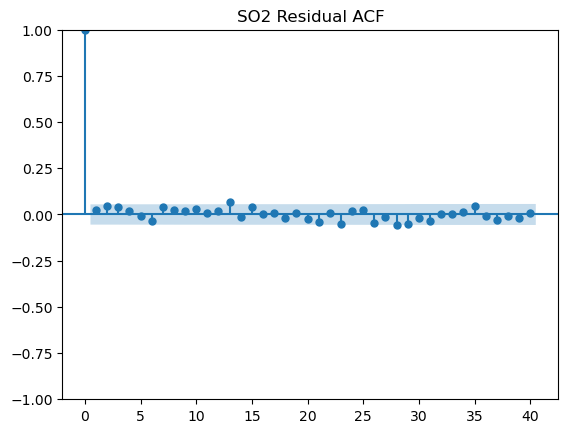

<Figure size 1200x400 with 0 Axes>

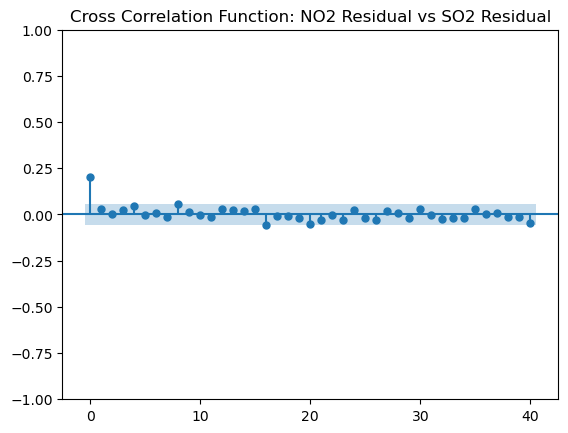

In [83]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_ccf

# 1. 잔차 상관계수 계산
corr = residual_df['NO2_resid'].corr(residual_df['SO2_resid'])
print(f"잔차 상관계수 (NO2_resid vs SO2_resid): {corr:.4f}")

# 2. NO2 잔차 자기상관
plt.figure(figsize=(12,4))
plot_acf(residual_df['NO2_resid'], lags=40, title='NO2 Residual ACF')
plt.show()

# 3. SO2 잔차 자기상관
plt.figure(figsize=(12,4))
plot_acf(residual_df['SO2_resid'], lags=40, title='SO2 Residual ACF')
plt.show()

# 4. 잔차 간 교차상관 (NO2 -> SO2)
plt.figure(figsize=(12,4))
plot_ccf(residual_df['NO2_resid'], residual_df['SO2_resid'], lags=40)
plt.title('Cross Correlation Function: NO2 Residual vs SO2 Residual')
plt.show()

In [91]:
Economy = pd.read_csv("data/Economy.csv")

In [92]:
Economy

,Notes,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,discontinued,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,Source.Ref,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5,18,19,21,22,30,2,3
1,Date,CSI,China.PMI,China.Retail.Sales,Coal.Prod.Index,Hydro.Power.Index,Passenger.Vehicle.Exp,WMP.Imports,Coal.Imports,Mongolia.Coal.Inv,Mine.Rail.Traffic,Copper,Copper.Cathode,Copper.Cathode.East,Copper.Cathode.North,AVG.COAL.Px,CN2YT=RR,CN5YT=RR
2,2025-07-11,"4,018",50,"4,133",403,99,"467,759","31,953","17,302,831",362,421,"¥78,775","¥78,720","¥78,620","¥78,535",¥633,1.41,1.53
3,2025-07-04,"3,982",50,"4,133",403,99,"467,759","31,953","17,302,831",362,421,"¥80,580","¥80,535","¥80,390","¥80,270",¥631,1.35,1.5
4,2025-06-27,"3,922",50,"4,133",403,99,"467,759","31,953","17,302,831",362,421,"¥80,160","¥80,125","¥80,255","¥79,855",¥631,1.36,1.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,2010-08-20,0,52,"1,257",0,82,0,0,0,0,0,¥0,¥0,¥0,¥0,¥0,2.17,2.62
780,2010-08-13,0,52,"1,257",0,82,0,0,0,0,0,¥0,¥0,¥0,¥0,¥0,2.2,2.62
781,2010-08-06,0,52,"1,257",0,82,0,0,0,0,0,¥0,¥0,¥0,¥0,¥0,2.22,2.66
782,2010-07-30,0,51,"1,225",0,83,0,0,0,0,0,¥0,¥0,¥0,¥0,¥0,2.22,2.65


In [93]:
Economy.columns =[ 'Date', 'CSI', 'PMI', 'Retail', 'Coal_Prod_Idx', 'Hydro_Power_Idx', 'Pss_Veh_Exp', 'WMP_Import', 'Coal_impprt', 'Mong_Coal_Inv', 'Mine_Rail_Traffic','Copper', 'Copper_Cathode', 'Cooper_Cathod_East', 'Cooper.Cathode.North', 'Avg_Coal_px', 'CN2YT','CN5YT']

In [97]:
Economy = Economy.drop(index=[1, 2])


In [98]:
Economy = Economy[Economy['Date'] != 'Source.Ref']
Economy['Date'] = pd.to_datetime(Economy['Date'], errors='coerce')

In [110]:
cols_to_convert = Economy.columns.difference(['Date'])
Economy[cols_to_convert] = Economy[cols_to_convert].apply(pd.to_numeric, errors='coerce')

In [111]:
Economy.dtypes

Date                    datetime64[ns]
CSI                            float64
PMI                              int64
Retail                         float64
Coal_Prod_Idx                    int64
Hydro_Power_Idx                  int64
Pss_Veh_Exp                    float64
WMP_Import                     float64
Coal_impprt                    float64
Mong_Coal_Inv                    int64
Mine_Rail_Traffic                int64
Copper                         float64
Copper_Cathode                 float64
Cooper_Cathod_East             float64
Cooper.Cathode.North           float64
Avg_Coal_px                    float64
CN2YT                          float64
CN5YT                          float64
dtype: object

In [112]:
df_port.columns =['Date','NO2']

In [113]:
merged_df = pd.merge(df_port, Economy, on='Date', how='inner')
merged_df = merged_df.sort_values(by='Date')


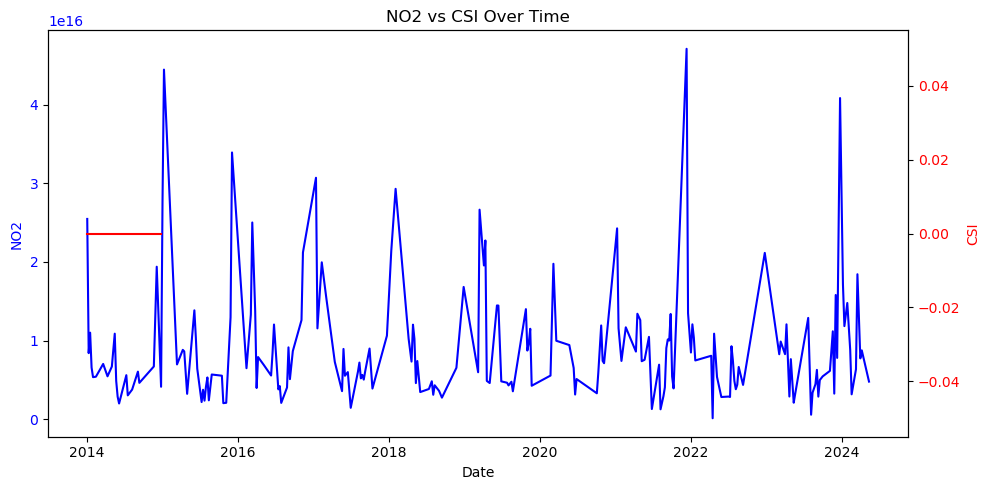

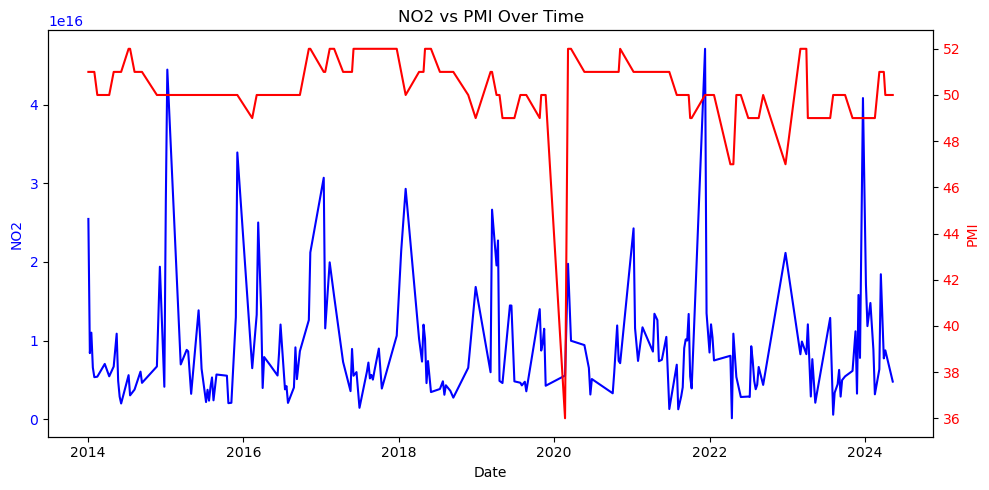

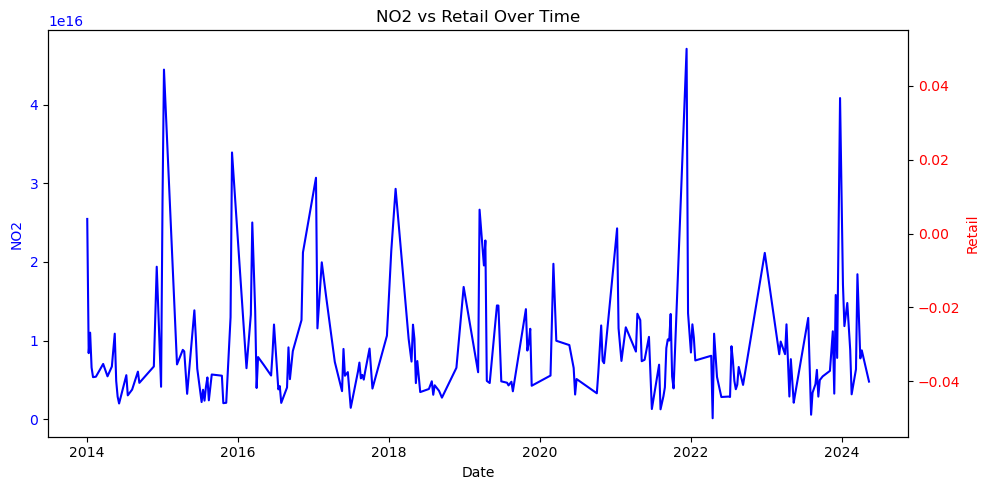

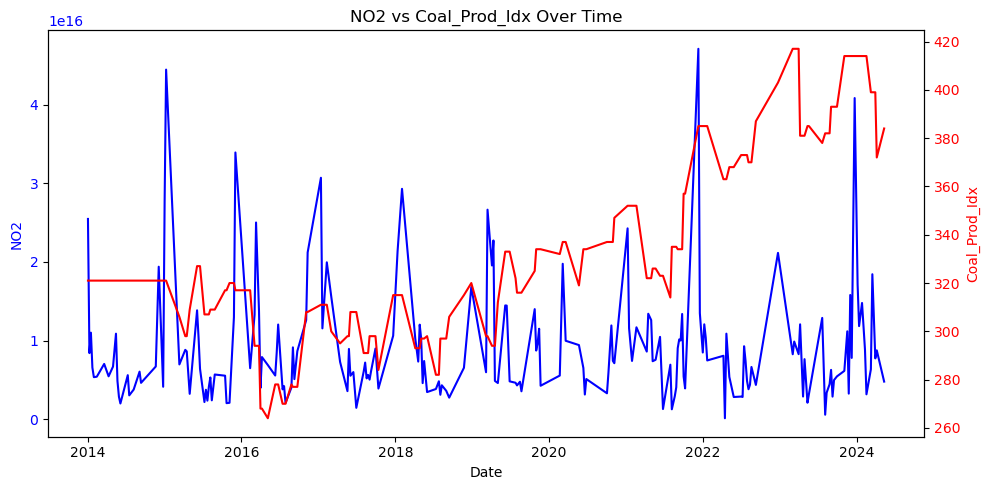

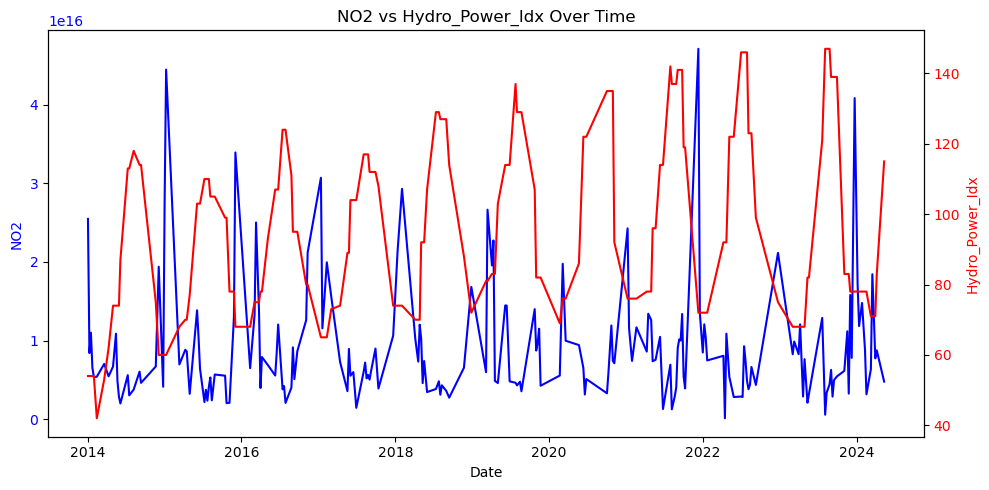

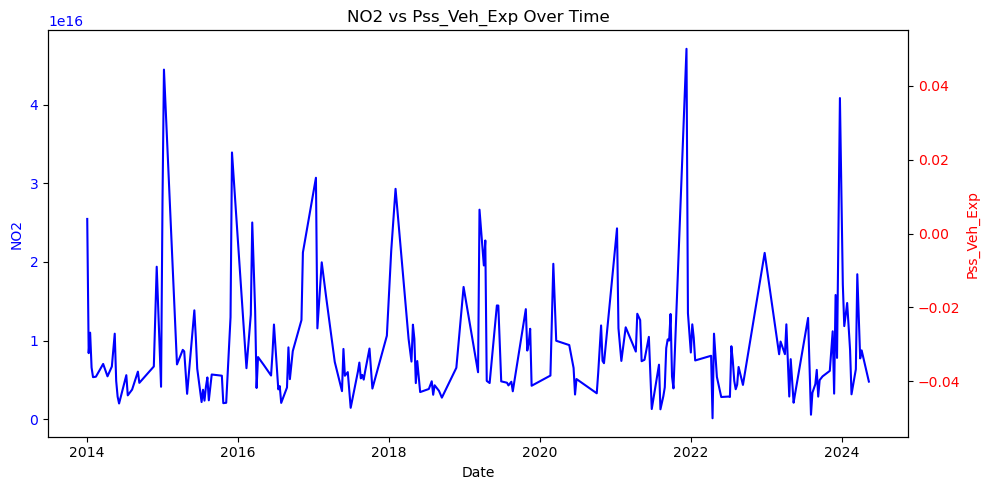

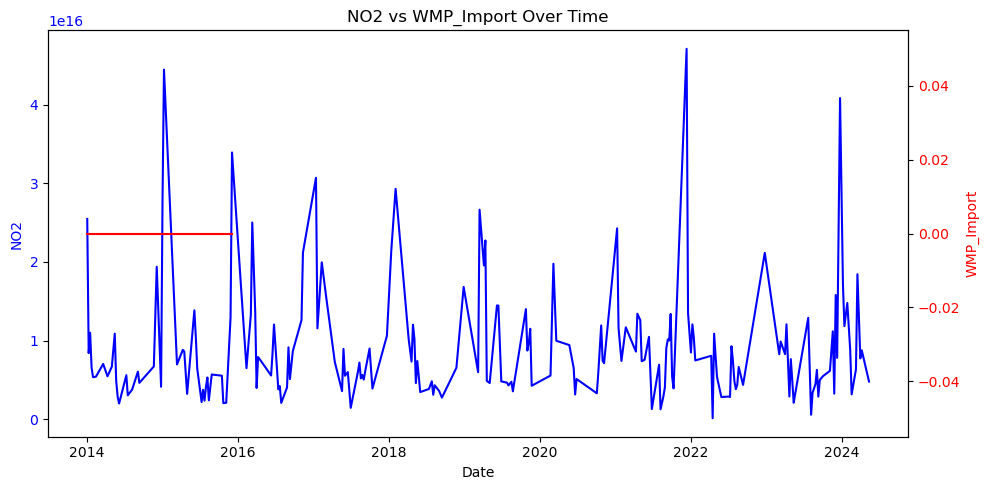

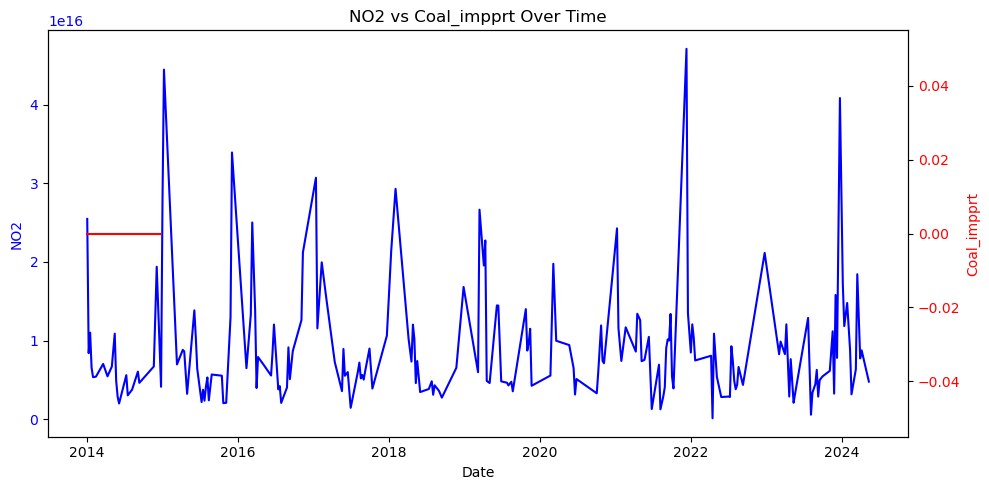

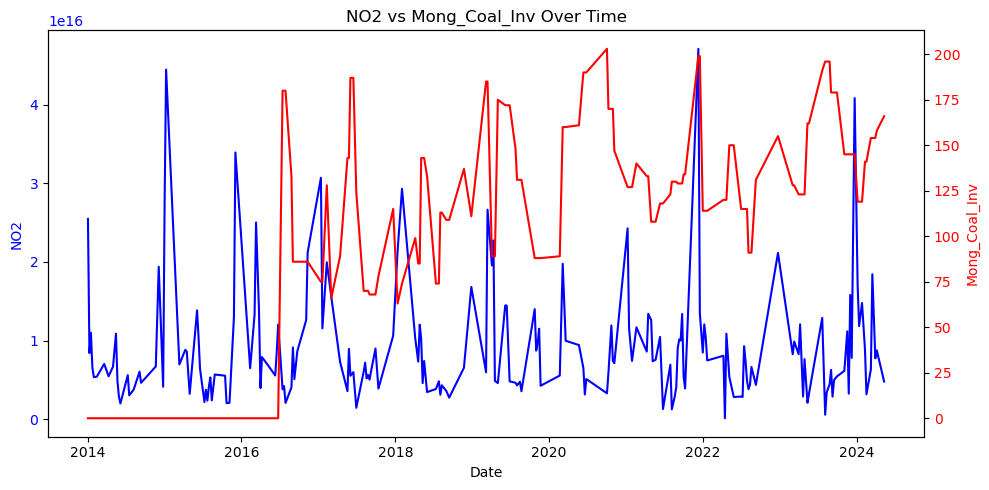

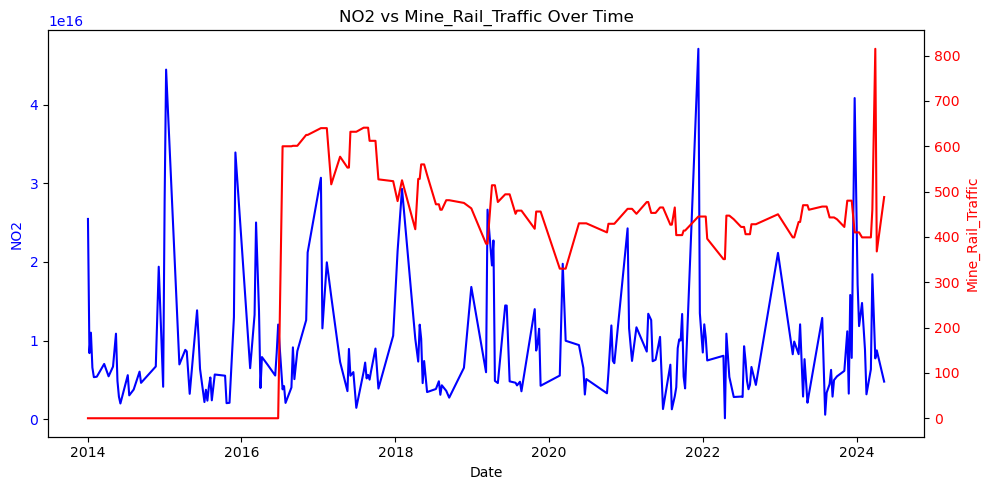

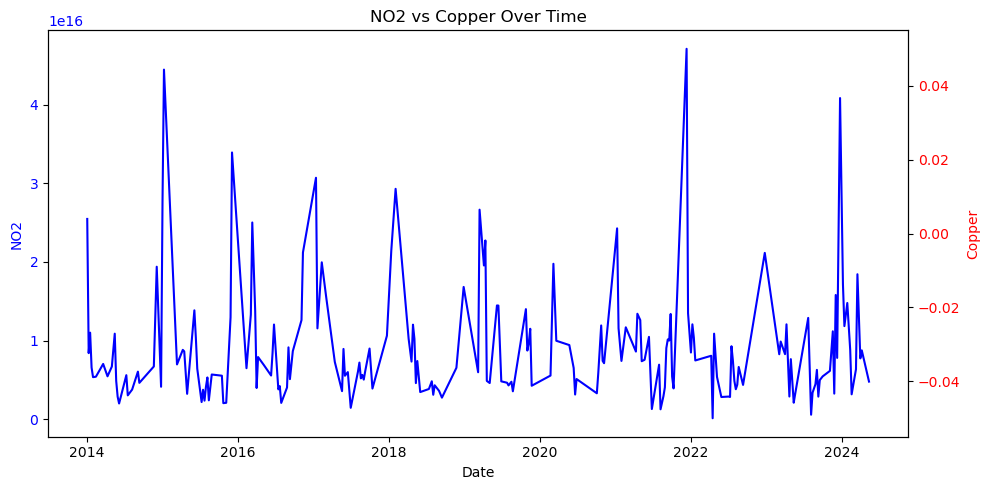

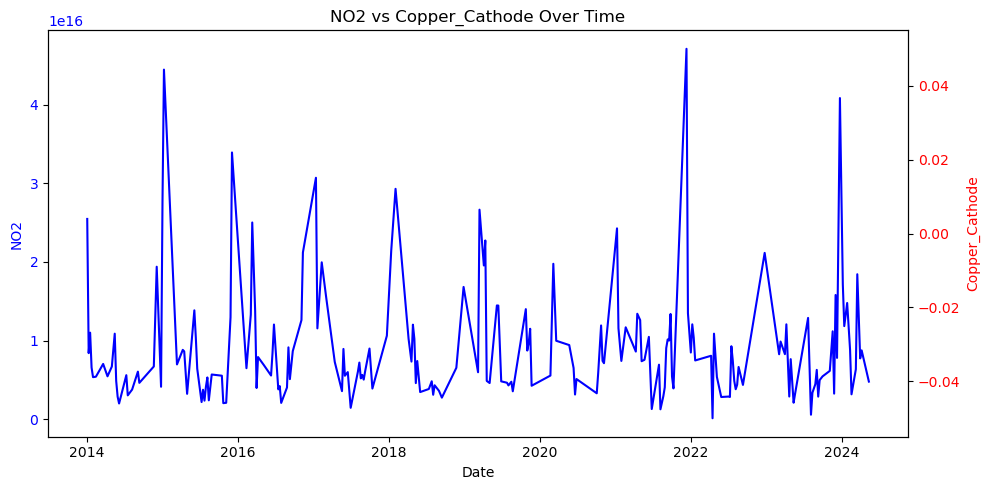

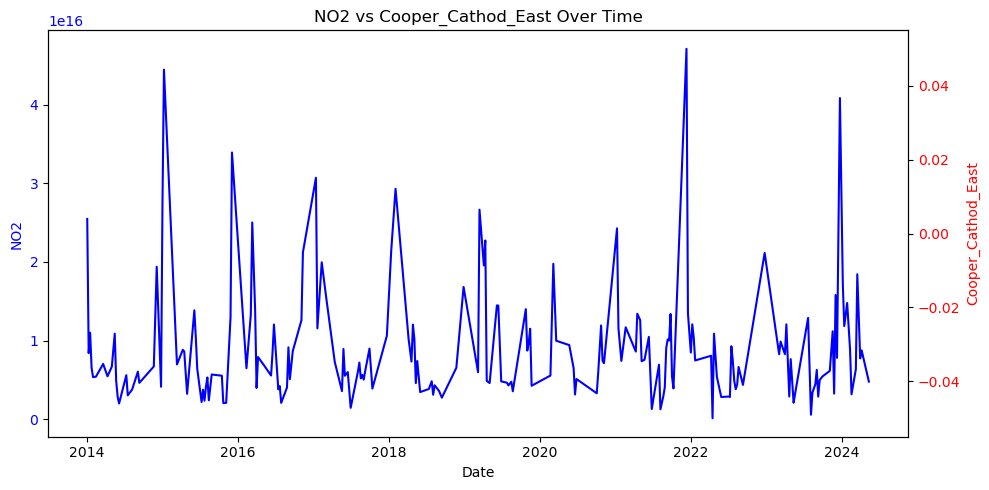

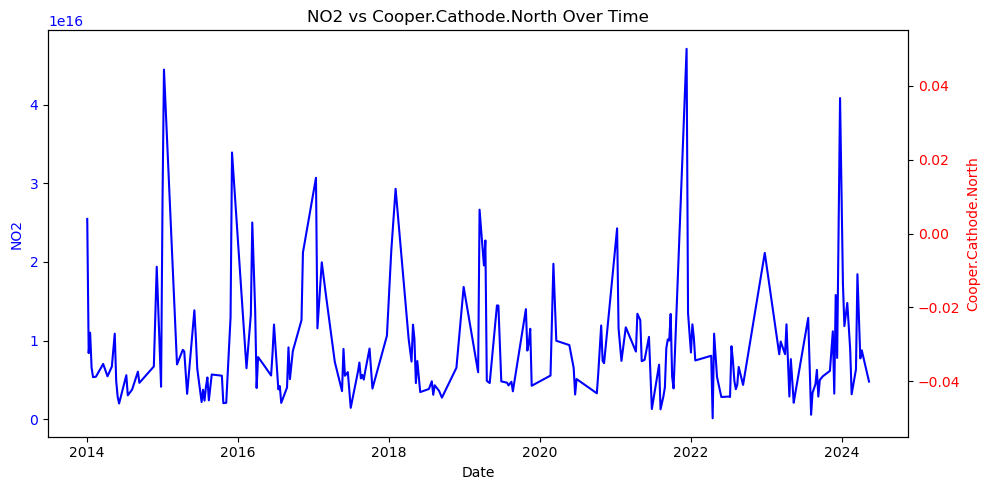

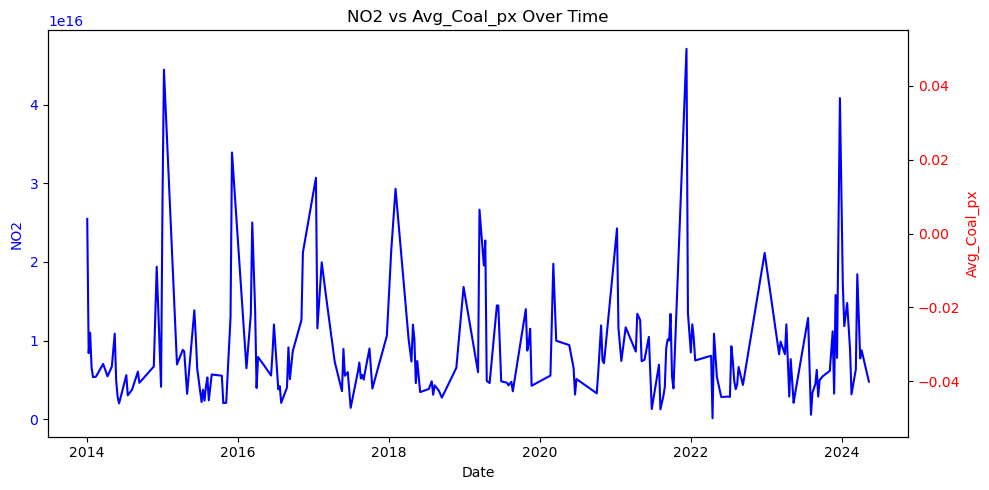

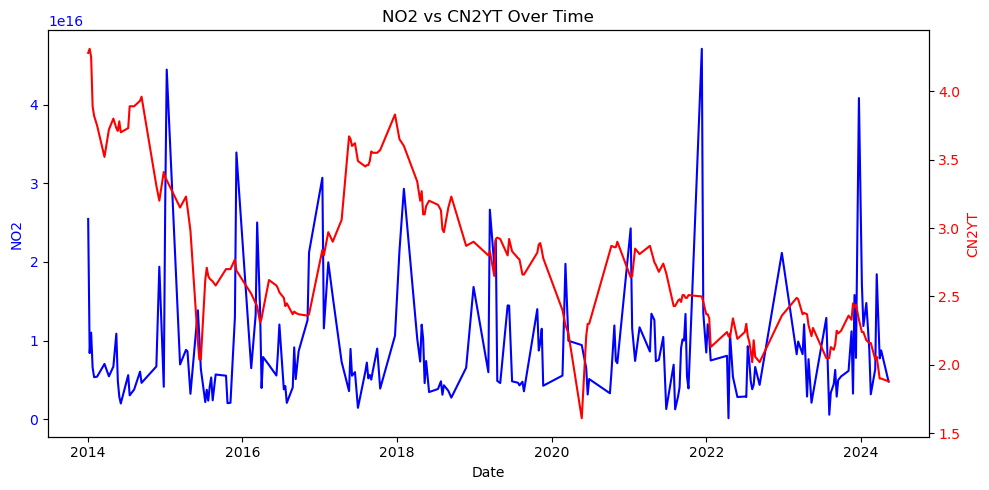

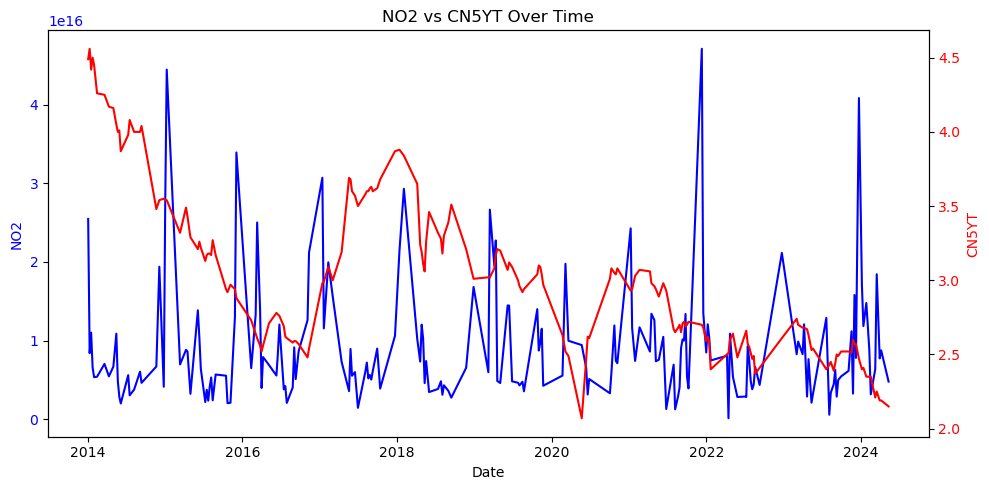

In [114]:
import matplotlib.pyplot as plt

other_cols = [col for col in merged_df.columns if col not in ['Date', 'NO2']]

for col in other_cols:
    fig, ax1 = plt.subplots(figsize=(10,5))

    # 왼쪽 y축: NO2
    ax1.plot(merged_df['Date'], merged_df['NO2'], color='blue', label='NO2')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('NO2', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # 오른쪽 y축: 다른 컬럼
    ax2 = ax1.twinx()
    ax2.plot(merged_df['Date'], merged_df[col], color='red', label=col)
    ax2.set_ylabel(col, color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    plt.title(f'NO2 vs {col} Over Time')
    fig.tight_layout()
    plt.show()